In [1]:
import warnings
warnings.filterwarnings('ignore')
from agent import Agent
from trading_env import TradingEnv
from collections import deque
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
WINDOW_SIZE = 160
starting_amount = 10000
allowance = 30
companies = ['AAPL', 'AMZN', 'COST', 'DIS', 'F', 'GM', 'GOOG', 'INTC', 'JNJ', 'LCID', 'META', 'MRNA', 'MSFT', 'NFLX', 'NKE', 'PFE', 'RBLX', 'SBUX', 'TGT', 'TSLA', 'TWTR', 'WMT']
agent = Agent(stock_size=WINDOW_SIZE, finance_size=29, action_size=1)

In [3]:
def training(env, n_episodes=200, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.996):
    """Deep Q-Learning
    
    Params
    ======
        n_episodes (int): maximum number of training epsiodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon 
        eps_decay (float): mutiplicative factor (per episode) for decreasing epsilon
        
    """
    rewards = [] # list containing score from each episode
    rewards_window = deque(maxlen=100) # last 100 scores
    portfolio_values = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        portfolio_values.append(env.portfolio_value)
        stock_state, finance_state = env.reset()
        total_reward = 0
        for t in range(max_t):
            action = agent.act(stock_state, finance_state, eps)
            next_stock_state, next_finance_state, reward, done, _ = env.step(action)
            agent.step(stock_state, finance_state, action, reward, next_stock_state, next_finance_state, done)
            ## above step decides whether we will train(learn) the network
            ## actor (local_qnetwork) or we will fill the replay buffer
            ## if len replay buffer is equal to the batch size then we will
            ## train the network or otherwise we will add experience tuple in our 
            ## replay buffer.
            stock_state = next_stock_state
            finance_state = next_finance_state
            total_reward += reward
            if done:
                break
            rewards_window.append(total_reward)
            rewards.append(total_reward)
            eps = max(eps*eps_decay,eps_end)
            print('\rEpisode {}\tAverage Reward {:.2f}'.format(i_episode, np.mean(rewards_window)), end=" ")
                
                
    print("\n")
    return rewards, portfolio_values

In [4]:
rewards = {}
portfolio_values = {}

In [5]:
for company in companies:
    print(company)
    env = TradingEnv(company, window_size=WINDOW_SIZE)
    rewards[company], portfolio_values[company] = training(env, n_episodes=50)
    
with open('data/pickled_results/rewards.pkl', 'wb') as outfile:
    pickle.dump(rewards, outfile)

with open('data/pickled_results/portfolio_values.pkl', 'wb') as outfile:
    pickle.dump(portfolio_values, outfile)

AAPL
Episode 50	Average Reward 14974.41    

AMZN
Episode 50	Average Reward 37836.58    

COST
Episode 50	Average Reward 0.00    

DIS
Episode 50	Average Reward -3400.29  

F
Episode 50	Average Reward -18372.24 

GM
Episode 50	Average Reward 12605.67   

GOOG
Episode 50	Average Reward -19736.93  

INTC
Episode 50	Average Reward 11832.46   

JNJ
Episode 50	Average Reward -15866.78  

LCID
Episode 50	Average Reward 0.00     

META
Episode 50	Average Reward -10039.78   

MRNA
Episode 50	Average Reward 0.00 .63   

MSFT
Episode 50	Average Reward -3001.79    

NFLX
Episode 50	Average Reward 506.82    

NKE
Episode 50	Average Reward 0.00     

PFE
Episode 50	Average Reward 5974.84    

RBLX
Episode 50	Average Reward 0.00     

SBUX
Episode 50	Average Reward -235.59       

TGT
Episode 50	Average Reward 0.00     

TSLA
Episode 50	Average Reward -49548.99   

TWTR
Episode 50	Average Reward 55603.48   

WMT
Episode 50	Average Reward 0.00     



# Plot Rewards per Stock

In [91]:
for k, v in rewards.items():
    plt.plot(v, label=k)
plt.ylabel("Reward")
plt.xlabel("Iteration")
plt.legend(loc=(1.04, 0))
plt.title(f"Rewards per stock")
plt.show()

AttributeError: 'list' object has no attribute 'items'

# Plot Average Rewards

In [90]:
avg_rewards = np.zeros(len(list(rewards.values())))
for v in rewards.values():
    avg_rewards = np.mean([v, avg_rewards], axis=0)
    print("HI")

rewards = list(rewards.values())
print(np.mean(rewards, axis=0))
avg_reward = np.mean(list(rewards.values()), axis=0)
# print(avg_reward[:2])
plt.ylabel("Reward")
plt.xlabel("Iteration")
plt.legend(loc=(1.04, 0))
plt.title(f"Rewards per stock")
plt.show()

AttributeError: 'list' object has no attribute 'values'

# Plot Portfolio Value Per Stock

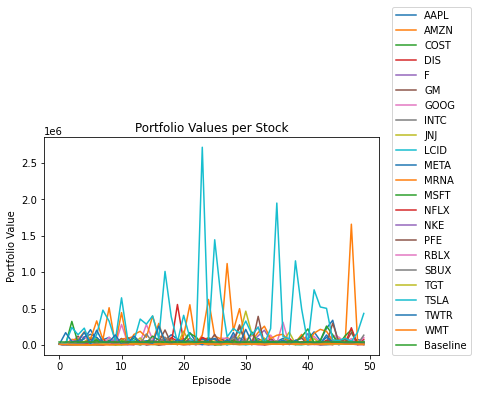

In [74]:
for k, v in portfolio_values.items():
    plt.plot(v, label=k)
plt.plot([starting_amount + 1000*allowance for _ in range(50)], label="Baseline")
plt.legend(loc=(1.04, 0))
plt.ylabel("Portfolio Value")
plt.xlabel("Episode")
plt.title(f"Portfolio Values per Stock")
plt.show()

# Plot Average Portfolio Value

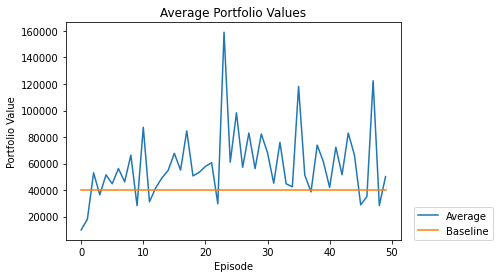

In [53]:
avg_portfolio_value = np.mean(list(portfolio_values.values()), axis=0)
plt.plot(avg_portfolio_value, label="Average")
plt.plot([starting_amount + 1000*allowance for _ in range(50)], label="Baseline")
plt.legend(loc=(1.04, 0))
plt.ylabel("Portfolio Value")
plt.xlabel("Episode")
plt.title(f"Average Portfolio Values")
plt.show()